In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
df = pd.read_excel('Year XXXX Processed Data Template  copy.xlsx', sheet_name = '2007-2009')

In [8]:
df.shape

(51, 26)

In [9]:
df.describe()

,Total Revenue,Total Expenditure,Federal Revenue,State Revenue,Local Revenue,Instructional Spending,Support System Spending,Per Pupil Instructional,Per Pupil Support Systems,Pupils,...,Other,Construction,Instructional Equipment,8th Grade Math Score Avg,4th Grade Math Score Avg,8th Grade Reading Score Avg,4th Grade Reading Score Avg,8th Grade Score Avg,4th Grade Score Avg,Overall Score Avg
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000,...,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,6.683723e+05,8.824307e+05,1.856122e+05,2.225930e+05,2.601672e+05,4.643756e+05,2.643996e+05,565.254902,355.254902,50500.274510,...,22202.588235,8.503457e+04,-10.901961,1.798703,-0.147530,1.170912,-0.195777,1.484807,-0.171653,0.656577
std,1.115930e+06,1.471989e+06,4.275353e+05,9.107435e+05,4.909466e+05,6.733417e+05,3.353716e+05,371.586590,252.442535,62907.632187,...,57860.682174,4.918986e+05,11465.628447,1.814184,3.430022,1.660487,2.053578,1.513706,1.830787,1.217548
min,-2.405625e+06,-9.824630e+05,-7.147700e+04,-2.531346e+06,-5.358280e+05,-1.861510e+05,-3.678170e+05,-209.000000,-51.000000,-43599.000000,...,-216182.000000,-1.253146e+06,-38262.000000,-1.556150,-20.824413,-2.562594,-3.986154,-1.809659,-7.962863,-2.208120
25%,1.501175e+05,1.568385e+05,1.296450e+04,3.320700e+04,3.644400e+04,9.361650e+04,6.027100e+04,286.500000,198.000000,16855.000000,...,2825.000000,-6.613850e+04,-3692.500000,0.593981,-0.886701,-0.006076,-1.818260,0.541212,-1.105178,-0.124547
50%,4.805500e+05,6.143520e+05,4.055700e+04,2.114550e+05,1.272090e+05,2.922060e+05,1.732450e+05,485.000000,309.000000,30552.000000,...,12555.000000,1.243500e+04,104.000000,1.802767,-0.075341,1.242085,-0.358009,1.509047,-0.336483,0.657019
75%,7.437285e+05,1.045392e+06,1.417125e+05,3.622270e+05,3.139365e+05,5.543330e+05,3.333335e+05,745.000000,452.000000,66396.500000,...,42950.000000,1.586580e+05,2638.000000,2.599752,1.525329,1.951862,1.114381,2.502302,0.990052,1.227678
max,5.112282e+06,7.616316e+06,2.544953e+06,3.756207e+06,2.261186e+06,3.729609e+06,1.441831e+06,1661.000000,1508.000000,312362.000000,...,203593.000000,2.628878e+06,33685.000000,6.135723,3.747982,4.888069,4.898687,5.445083,3.460955,3.655182


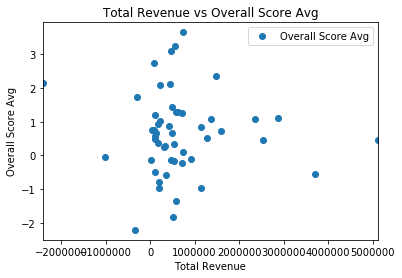

In [10]:
df.plot(x='Total Revenue', y='Overall Score Avg', style='o')
plt.title('Total Revenue vs Overall Score Avg')
plt.xlabel('Total Revenue')
plt.ylabel('Overall Score Avg')
plt.show()

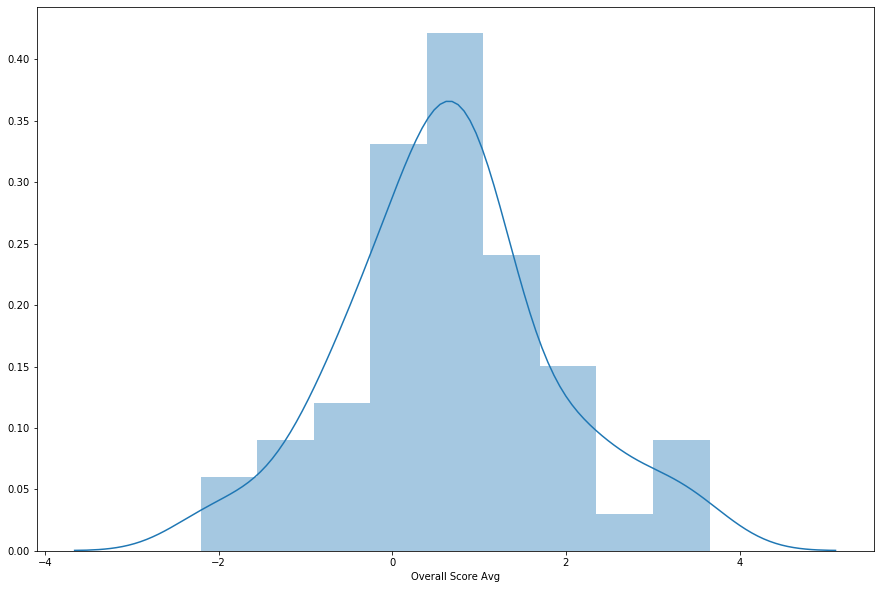

In [11]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['Overall Score Avg'])

In [12]:
X = df['Total Revenue'].values.reshape(-1,1)
y = df['Overall Score Avg'].values.reshape(-1,1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(regressor.intercept_)
print(regressor.coef_)

[0.59094365]
[[-7.56552794e-08]]


In [16]:
y_pred = regressor.predict(X_test)


In [17]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df2

,Actual,Predicted
0,2.101475,0.574660
1,1.727068,0.613325
2,1.025639,0.574194
3,-0.047660,0.667155
4,0.768289,0.588314
5,2.132313,0.557810
6,0.752941,0.583483
7,0.473220,0.204173
8,0.672662,0.581026
9,1.072862,0.486804


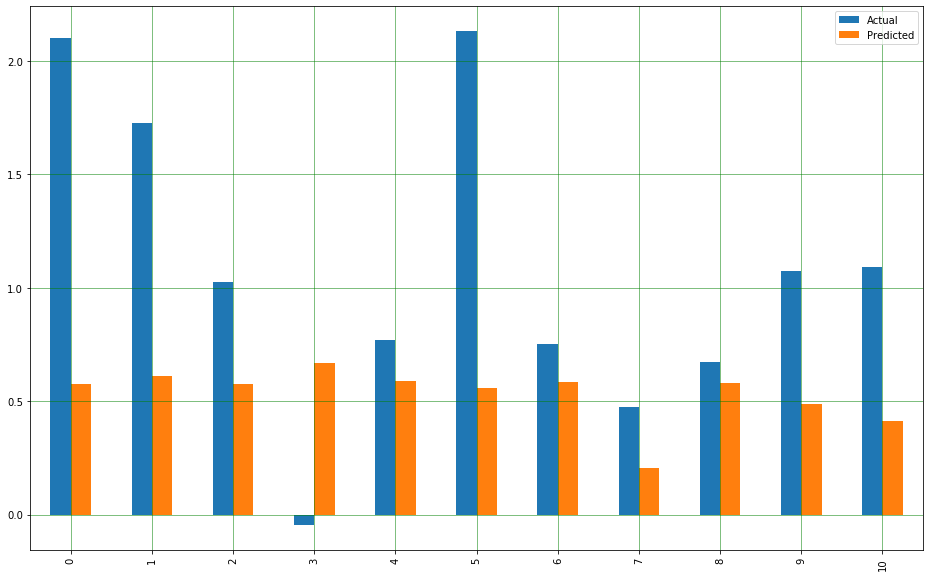

In [18]:
df3 = df2.head(25)
df3.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

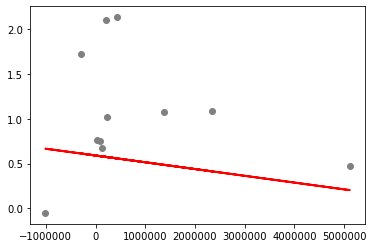

In [19]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6687087871965346
Mean Squared Error: 0.7009869936999461
Root Mean Squared Error: 0.8372496603164113
